In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Train dataset
train_data = pd.read_csv('train/train.csv')
train_data

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
...,...,...,...,...,...
78364,128587,8,71,1523,0
78365,128589,30,547,937,0
78366,128590,8,754,1004,0
78367,128592,13,134,71,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [5]:
# test data
test_data = pd.read_csv('test.csv')
test_data

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811
...,...,...,...,...
50221,128584,20,843,501
50222,128588,25,415,481
50223,128591,25,596,1336
50224,128593,22,518,748


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           50226 non-null  int64
 1   campaign_id  50226 non-null  int64
 2   coupon_id    50226 non-null  int64
 3   customer_id  50226 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [7]:
# Customer Transaction Dataset
customer_transaction_data = pd.read_csv('train/customer_transaction_data.csv')
customer_transaction_data

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
...,...,...,...,...,...,...,...
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0


In [8]:
customer_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [9]:
customer_transaction_data = customer_transaction_data.sample(n=5000)

In [10]:
customer_transaction_data = customer_transaction_data.drop(['date','item_id'],axis=1)
customer_transaction_data

,customer_id,quantity,selling_price,other_discount,coupon_discount
796984,389,1,60.20,0.00,-10.69
1300448,1451,1,45.95,0.00,0.00
464167,209,1,89.05,-17.45,0.00
368839,592,1,61.27,-6.06,0.00
993205,331,1,21.02,0.00,0.00
...,...,...,...,...,...
821581,839,1,59.49,-82.64,0.00
844906,604,1,8.90,0.00,0.00
756972,890,1,71.24,-28.14,0.00
814876,886,1,71.24,-13.89,0.00


In [11]:
# Merge train_data and customer_transaction_data
train_transaction_data = pd.merge(train_data, customer_transaction_data, left_on = 'customer_id', right_on = 'customer_id')
train_transaction_data

,id,campaign_id,coupon_id,customer_id,redemption_status,quantity,selling_price,other_discount,coupon_discount
0,1,13,27,1053,0,1,59.49,-29.21,0.0
1,2444,13,513,1053,0,1,59.49,-29.21,0.0
2,3651,13,166,1053,0,1,59.49,-29.21,0.0
3,7712,13,766,1053,0,1,59.49,-29.21,0.0
4,15317,13,165,1053,0,1,59.49,-29.21,0.0
...,...,...,...,...,...,...,...,...,...
307465,107584,26,545,472,0,1,71.24,-40.96,0.0
307466,107584,26,545,472,0,1,113.63,0.00,0.0
307467,122644,26,752,472,0,1,113.63,0.00,0.0
307468,122644,26,752,472,0,1,71.24,-40.96,0.0


In [12]:
test_transaction_data = pd.merge(test_data, customer_transaction_data, left_on = 'customer_id', right_on = 'customer_id')
test_transaction_data

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount
0,3,22,869,967,1,106.50,0.00,0.0
1,3,22,869,967,1,88.69,0.00,0.0
2,3,22,869,967,1,78.01,-10.69,0.0
3,4382,18,717,967,1,106.50,0.00,0.0
4,4382,18,717,967,1,88.69,0.00,0.0
...,...,...,...,...,...,...,...,...
232362,123403,24,42,1424,1,70.88,0.00,0.0
232363,50974,24,42,1286,1,101.16,0.00,0.0
232364,69055,24,43,1286,1,101.16,0.00,0.0
232365,94183,24,42,710,1,35.62,-25.65,0.0


In [13]:
# Customer Demographics dataset"
customer_demographics_data = pd.read_csv('train/customer_demographics.csv')
customer_demographics_data

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
...,...,...,...,...,...,...,...
755,1577,36-45,NaN,0,2,NaN,5
756,1578,46-55,Married,0,3,1,6
757,1579,46-55,NaN,0,1,NaN,4
758,1580,26-35,NaN,0,2,NaN,5


In [14]:
customer_demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [15]:
customer_demographics_data['marital_status'].replace({np.NaN:'Unknown'}, inplace = True)
customer_demographics_data['no_of_children'].replace({np.NaN:0}, inplace = True)


In [16]:
encoded_customer_demographics_data = pd.get_dummies(customer_demographics_data, columns = ['marital_status', 'age_range'])
encoded_customer_demographics_data

,customer_id,rented,family_size,no_of_children,income_bracket,marital_status_Married,marital_status_Single,marital_status_Unknown,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+
0,1,0,2,0,4,1,0,0,0,0,0,0,0,1
1,6,0,2,0,5,1,0,0,0,0,0,1,0,0
2,7,0,3,1,3,0,0,1,0,1,0,0,0,0
3,8,0,4,2,6,0,0,1,0,1,0,0,0,0
4,10,0,1,0,5,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,1577,0,2,0,5,0,0,1,0,0,1,0,0,0
756,1578,0,3,1,6,1,0,0,0,0,0,1,0,0
757,1579,0,1,0,4,0,0,1,0,0,0,1,0,0
758,1580,0,2,0,5,0,0,1,0,1,0,0,0,0


In [17]:
train_transaction_demographic_data = pd.merge(train_transaction_data, encoded_customer_demographics_data, left_on='customer_id', right_on = 'customer_id')
train_transaction_demographic_data

,id,campaign_id,coupon_id,customer_id,redemption_status,quantity,selling_price,other_discount,coupon_discount,rented,...,income_bracket,marital_status_Married,marital_status_Single,marital_status_Unknown,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+
0,1,13,27,1053,0,1,59.49,-29.21,0.0,0,...,5,0,0,1,0,0,0,1,0,0
1,2444,13,513,1053,0,1,59.49,-29.21,0.0,0,...,5,0,0,1,0,0,0,1,0,0
2,3651,13,166,1053,0,1,59.49,-29.21,0.0,0,...,5,0,0,1,0,0,0,1,0,0
3,7712,13,766,1053,0,1,59.49,-29.21,0.0,0,...,5,0,0,1,0,0,0,1,0,0
4,15317,13,165,1053,0,1,59.49,-29.21,0.0,0,...,5,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198688,93307,26,769,507,0,9874,819.26,-0.36,0.0,0,...,6,1,0,0,0,0,0,0,0,1
198689,104124,26,468,507,0,9874,819.26,-0.36,0.0,0,...,6,1,0,0,0,0,0,0,0,1
198690,114906,26,947,507,0,9874,819.26,-0.36,0.0,0,...,6,1,0,0,0,0,0,0,0,1
198691,118711,26,2,507,0,9874,819.26,-0.36,0.0,0,...,6,1,0,0,0,0,0,0,0,1


In [18]:
test_transaction_demographic_data = pd.merge(test_transaction_data, encoded_customer_demographics_data, left_on = 'customer_id', right_on = 'customer_id')
test_transaction_demographic_data

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount,rented,family_size,...,income_bracket,marital_status_Married,marital_status_Single,marital_status_Unknown,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+
0,3,22,869,967,1,106.50,0.00,0.0,0,1,...,5,0,0,1,0,0,1,0,0,0
1,3,22,869,967,1,88.69,0.00,0.0,0,1,...,5,0,0,1,0,0,1,0,0,0
2,3,22,869,967,1,78.01,-10.69,0.0,0,1,...,5,0,0,1,0,0,1,0,0,0
3,4382,18,717,967,1,106.50,0.00,0.0,0,1,...,5,0,0,1,0,0,1,0,0,0
4,4382,18,717,967,1,88.69,0.00,0.0,0,1,...,5,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156862,123403,24,42,1424,2,284.25,0.00,0.0,0,4,...,5,1,0,0,0,0,0,1,0,0
156863,123403,24,42,1424,1,106.50,0.00,0.0,0,4,...,5,1,0,0,0,0,0,1,0,0
156864,123403,24,42,1424,1,71.24,-60.20,0.0,0,4,...,5,1,0,0,0,0,0,1,0,0
156865,123403,24,42,1424,1,118.97,-23.15,0.0,0,4,...,5,1,0,0,0,0,0,1,0,0


In [19]:
# Campaign dataset
campaign_data = pd.read_csv('train/campaign_data.csv')
campaign_data

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [20]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [21]:
# Selecting only 2 columns 
campaign_data = campaign_data[['campaign_id', 'campaign_type']]
campaign_data

,campaign_id,campaign_type
0,24,Y
1,25,Y
2,20,Y
3,23,Y
4,21,Y
5,22,X
6,18,X
7,19,Y
8,17,Y
9,16,Y


In [22]:
train_data = pd.merge(train_transaction_demographic_data, campaign_data, left_on = 'campaign_id', right_on = 'campaign_id')
train_data

,id,campaign_id,coupon_id,customer_id,redemption_status,quantity,selling_price,other_discount,coupon_discount,rented,...,marital_status_Married,marital_status_Single,marital_status_Unknown,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,campaign_type
0,1,13,27,1053,0,1,59.49,-29.21,0.0,0,...,0,0,1,0,0,0,1,0,0,X
1,2444,13,513,1053,0,1,59.49,-29.21,0.0,0,...,0,0,1,0,0,0,1,0,0,X
2,3651,13,166,1053,0,1,59.49,-29.21,0.0,0,...,0,0,1,0,0,0,1,0,0,X
3,7712,13,766,1053,0,1,59.49,-29.21,0.0,0,...,0,0,1,0,0,0,1,0,0,X
4,15317,13,165,1053,0,1,59.49,-29.21,0.0,0,...,0,0,1,0,0,0,1,0,0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198688,124083,27,728,1378,0,1,31.70,0.00,0.0,0,...,0,0,1,0,1,0,0,0,0,Y
198689,124083,27,728,1378,0,8622,890.50,-30.63,0.0,0,...,0,0,1,0,1,0,0,0,0,Y
198690,124083,27,728,1378,0,2,284.25,-42.74,0.0,0,...,0,0,1,0,1,0,0,0,0,Y
198691,124083,27,728,1378,0,1,142.12,0.00,0.0,0,...,0,0,1,0,1,0,0,0,0,Y


In [23]:
test_data = pd.merge(test_transaction_demographic_data, campaign_data, left_on = 'campaign_id', right_on = 'campaign_id')
test_data

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount,rented,family_size,...,marital_status_Married,marital_status_Single,marital_status_Unknown,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,campaign_type
0,3,22,869,967,1,106.50,0.00,0.0,0,1,...,0,0,1,0,0,1,0,0,0,X
1,3,22,869,967,1,88.69,0.00,0.0,0,1,...,0,0,1,0,0,1,0,0,0,X
2,3,22,869,967,1,78.01,-10.69,0.0,0,1,...,0,0,1,0,0,1,0,0,0,X
3,26710,22,492,967,1,106.50,0.00,0.0,0,1,...,0,0,1,0,0,1,0,0,0,X
4,26710,22,492,967,1,88.69,0.00,0.0,0,1,...,0,0,1,0,0,1,0,0,0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156862,123403,24,42,1424,2,284.25,0.00,0.0,0,4,...,1,0,0,0,0,0,1,0,0,Y
156863,123403,24,42,1424,1,106.50,0.00,0.0,0,4,...,1,0,0,0,0,0,1,0,0,Y
156864,123403,24,42,1424,1,71.24,-60.20,0.0,0,4,...,1,0,0,0,0,0,1,0,0,Y
156865,123403,24,42,1424,1,118.97,-23.15,0.0,0,4,...,1,0,0,0,0,0,1,0,0,Y


In [24]:
# Coupon Item mapping dataset
coupon_mapping_data = pd.read_csv('train/coupon_item_mapping.csv')
coupon_mapping_data

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77
...,...,...
92658,32,69268
92659,32,68502
92660,32,68612
92661,33,71390


In [25]:
coupon_mapping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [26]:
# Item dataset
item_data = pd.read_csv('train/item_data.csv')
item_data

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery
...,...,...,...,...
74061,74062,5490,Established,Pharmaceutical
74062,74063,5497,Established,Pharmaceutical
74063,74064,5497,Established,Pharmaceutical
74064,74065,5520,Established,Pharmaceutical


In [27]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [28]:
# Merging coupon mapping and item datasets
coupon_item_data = pd.merge(coupon_mapping_data, item_data, left_on = 'item_id', right_on = 'item_id')
coupon_item_data

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery
3,31,37,56,Local,Grocery
4,107,75,56,Local,Grocery
...,...,...,...,...,...
92658,33,68764,3867,Established,Meat
92659,29,74013,5383,Established,Miscellaneous
92660,29,71965,4554,Established,Miscellaneous
92661,29,67815,4985,Established,Flowers & Plants


In [29]:

# selecting only few variables
coupon_item_data = coupon_item_data[['coupon_id', 'brand']]
coupon_item_data = coupon_item_data.sample(n=50000)
coupon_item_data

,coupon_id,brand
64974,22,544
92077,753,860
65972,22,1713
24553,23,4362
37076,196,56
...,...,...
64006,6,56
25176,22,209
75793,258,4319
63551,22,56


In [30]:
train_data = train_data.sample(n=100000)
train_data = pd.merge(train_data, coupon_item_data, left_on = 'coupon_id', right_on = 'coupon_id')
train_data

,id,campaign_id,coupon_id,customer_id,redemption_status,quantity,selling_price,other_discount,coupon_discount,rented,...,marital_status_Single,marital_status_Unknown,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,campaign_type,brand
0,112804,11,971,1558,0,1,338.39,0.00,0.0,0,...,0,0,0,0,1,0,0,0,Y,1276
1,112804,11,971,1558,0,1,338.39,0.00,0.0,0,...,0,0,0,0,1,0,0,0,Y,1276
2,112804,11,971,1558,0,1,338.39,0.00,0.0,0,...,0,0,0,0,1,0,0,0,Y,1276
3,112804,11,971,1558,0,1,338.39,0.00,0.0,0,...,0,0,0,0,1,0,0,0,Y,1276
4,112804,11,971,1558,0,1,338.39,0.00,0.0,0,...,0,0,0,0,1,0,0,0,Y,1276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4725529,50581,1,847,72,0,1,26.71,-4.99,0.0,0,...,1,0,0,1,0,0,0,0,Y,1016
4725530,50581,1,847,72,0,1,26.71,-4.99,0.0,0,...,1,0,0,1,0,0,0,0,Y,1016
4725531,50581,1,847,72,0,1,70.88,-71.24,0.0,0,...,1,0,0,1,0,0,0,0,Y,1016
4725532,50581,1,847,72,0,1,70.88,-71.24,0.0,0,...,1,0,0,1,0,0,0,0,Y,1016


In [31]:
test_data = test_data.sample(n=40000)
test_data = pd.merge(test_data, coupon_item_data, left_on = 'coupon_id', right_on = 'coupon_id')
test_data           

,id,campaign_id,coupon_id,customer_id,quantity,selling_price,other_discount,coupon_discount,rented,family_size,...,marital_status_Single,marital_status_Unknown,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,campaign_type,brand
0,98025,18,240,1469,1,60.20,-10.69,0.0,0,2,...,0,1,0,0,0,1,0,0,X,56
1,98025,18,240,1469,1,60.20,-10.69,0.0,0,2,...,0,1,0,0,0,1,0,0,X,56
2,126730,18,240,1208,1,95.82,0.00,0.0,0,2,...,0,0,0,0,0,0,1,0,X,56
3,126730,18,240,1208,1,95.82,0.00,0.0,0,2,...,0,0,0,0,0,0,1,0,X,56
4,72972,18,240,400,1,59.49,-23.15,0.0,0,1,...,0,1,0,0,0,1,0,0,X,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154140,89353,21,768,28,1,35.26,0.00,0.0,0,2,...,0,1,0,0,0,1,0,0,Y,906
2154141,102685,21,768,1432,1,88.69,0.00,0.0,0,1,...,1,0,0,1,0,0,0,0,Y,906
2154142,102685,21,768,1432,1,88.69,0.00,0.0,0,1,...,1,0,0,1,0,0,0,0,Y,906
2154143,102685,21,768,1432,1,88.69,0.00,0.0,0,1,...,1,0,0,1,0,0,0,0,Y,906


In [32]:
train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)
final_train,final_test=train_data.align(test_data,join='inner',axis=1)

In [34]:
final_train.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'income_bracket', 'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'age_range_18-25', 'age_range_26-35',
       'age_range_36-45', 'age_range_46-55', 'age_range_56-70',
       'age_range_70+', 'brand', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_0',
       'no_of_children_1', 'no_of_children_2', 'no_of_children_3+',
       'campaign_type_X', 'campaign_type_Y'],
      dtype='object')

In [35]:
final_test.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'income_bracket', 'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'age_range_18-25', 'age_range_26-35',
       'age_range_36-45', 'age_range_46-55', 'age_range_56-70',
       'age_range_70+', 'brand', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_0',
       'no_of_children_1', 'no_of_children_2', 'no_of_children_3+',
       'campaign_type_X', 'campaign_type_Y'],
      dtype='object')

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X=final_train[['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'income_bracket', 'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'age_range_18-25', 'age_range_26-35',
       'age_range_36-45', 'age_range_46-55', 'age_range_56-70',
       'age_range_70+', 'brand', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_0',
       'no_of_children_1', 'no_of_children_2', 'no_of_children_3+',
       'campaign_type_X', 'campaign_type_Y']]
y=train_data['redemption_status']

model=RandomForestClassifier(n_estimators=10).fit(X,y)

cv_scores=cross_val_score(model,X,y,cv=10)

print('cross validation scores:',cv_scores,'\n','mean of cross validation scores:',np.mean(cv_scores))

cross validation scores: [0.96932202 0.97306551 0.97702062 0.88428201 0.89790563 0.96129746
 0.94805874 0.91057511 0.8899425  0.92671933] 
 mean of cross validation scores: 0.9338188936076672


<AxesSubplot:>

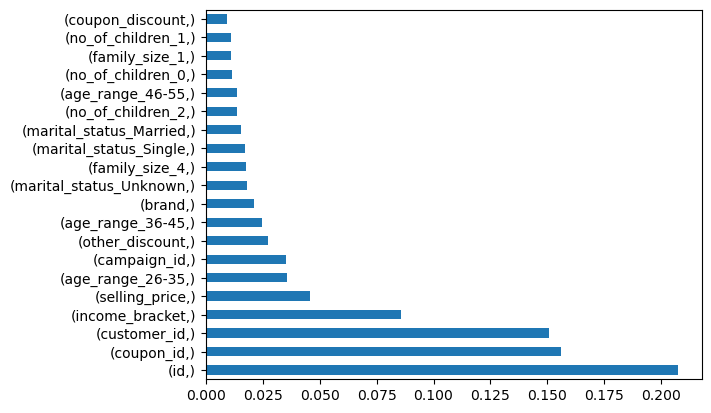

In [ ]:
feature_imp=pd.Series(model.feature_importances_, index = [['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'income_bracket', 'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'age_range_18-25', 'age_range_26-35',
       'age_range_36-45', 'age_range_46-55', 'age_range_56-70',
       'age_range_70+', 'brand', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_0',
       'no_of_children_1', 'no_of_children_2', 'no_of_children_3+',
       'campaign_type_X', 'campaign_type_Y']])

feature_imp.nlargest(20).plot(kind='barh')

In [59]:

feature_imp.T

id                        0.207497
campaign_id               0.035154
coupon_id                 0.156058
customer_id               0.150840
quantity                  0.006118
selling_price             0.045691
other_discount            0.027260
coupon_discount           0.009413
rented                    0.005237
income_bracket            0.085682
marital_status_Married    0.015602
marital_status_Single     0.017211
marital_status_Unknown    0.018007
age_range_18-25           0.003002
age_range_26-35           0.035643
age_range_36-45           0.024526
age_range_46-55           0.013572
age_range_56-70           0.007453
age_range_70+             0.008578
brand                     0.021270
family_size_1             0.011132
family_size_2             0.008499
family_size_3             0.007340
family_size_4             0.017535
family_size_5+            0.006720
no_of_children_0          0.011680
no_of_children_1          0.011031
no_of_children_2          0.013585
no_of_children_3+   

In [61]:
# Keeping only important features
train_data = train_data[['id', 'coupon_id', 'customer_id', 'income_bracket', 'selling_price', 'age_range_18-25', 'age_range 'campaign_id', 'other_discount', 'brand', 'marital_status', 'family_size']]
train_data

KeyError: "['age_range', 'marital_status', 'family_size'] not in index"

In [43]:
test_data= pd.get_dummies(test_data)
test_data.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'income_bracket', 'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'age_range_18-25', 'age_range_26-35',
       'age_range_36-45', 'age_range_46-55', 'age_range_56-70',
       'age_range_70+', 'brand', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_0',
       'no_of_children_1', 'no_of_children_2', 'no_of_children_3+',
       'campaign_type_X', 'campaign_type_Y'],
      dtype='object')

In [45]:
prediction=model.predict(test_data[['id', 'campaign_id', 'coupon_id', 'customer_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'rented',
       'income_bracket', 'marital_status_Married', 'marital_status_Single',
       'marital_status_Unknown', 'age_range_18-25', 'age_range_26-35',
       'age_range_36-45', 'age_range_46-55', 'age_range_56-70',
       'age_range_70+', 'brand', 'family_size_1', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5+', 'no_of_children_0',
       'no_of_children_1', 'no_of_children_2', 'no_of_children_3+',
       'campaign_type_X', 'campaign_type_Y']])

In [46]:
# Coupon Redemption Predictions
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
print('Redeem:',sum([1 for i in prediction if i==1]),'\nNot Redeem:',sum([1 for i in prediction if i==0]))

Redeem: 19943 
Not Redeem: 2134202
